In [9]:
!pip install pandas numpy seaborn matplotlib sklearn 

  Could not find a version that satisfies the requirement itertools (from versions: )
No matching distribution found for itertools


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os
import itertools
%matplotlib inline

In [12]:
df = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
print(df.shape)
print(df.columns)

(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [15]:
df['EmployeeCount'].unique()

array([1])

In [16]:
df['EmployeeCount'].unique()

array([1])

In [0]:
df.drop(['EmployeeNumber', 'EmployeeCount'], axis=1, inplace=True)

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


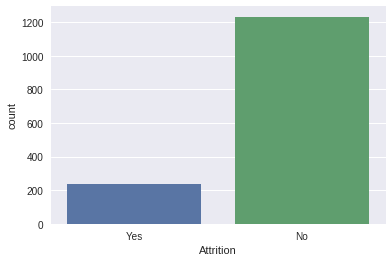

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


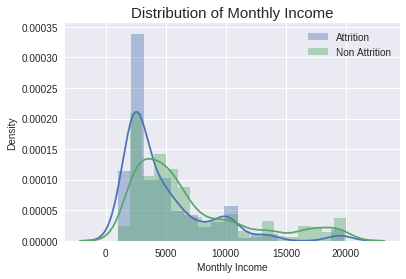

In [23]:
plt.figure(figsize=(6,4))
sns.distplot(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'], label='Attrition')
sns.distplot(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'], label='Non Attrition')
plt.xlabel('Monthly Income',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Distribution of Monthly Income',fontsize=15);
plt.legend()

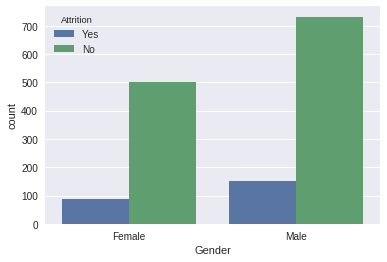

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Attrition', data=df)

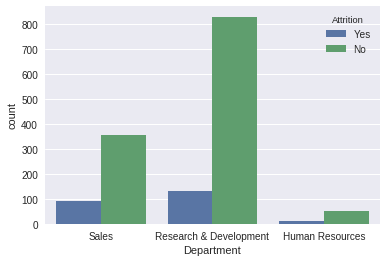

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='Department', hue='Attrition', data=df)

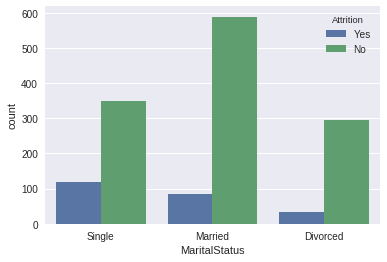

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)

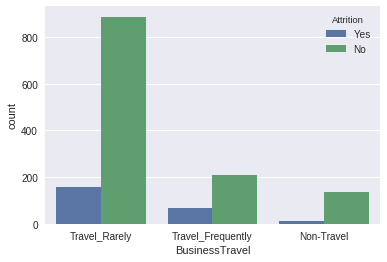

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)

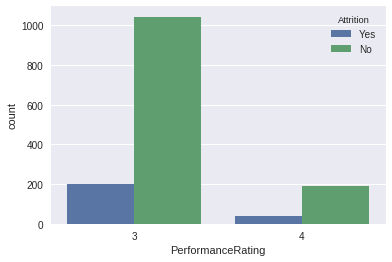

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df)

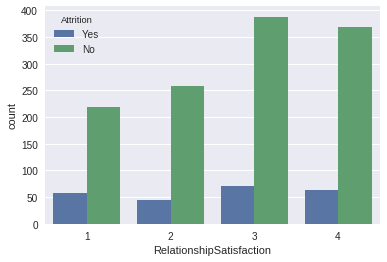

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df)

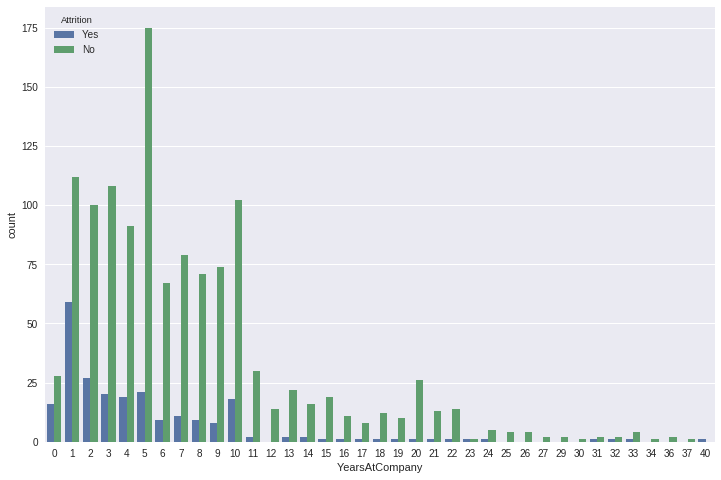

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df)

Text(0, 0.5, 'Monthly Income')

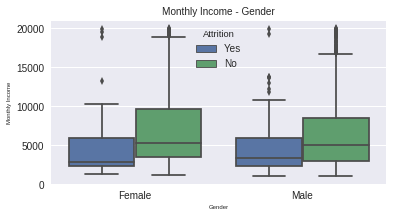

In [36]:
fig = plt.figure(figsize=(6,3))
sns.boxplot(x="Gender",y="MonthlyIncome",data=df, hue="Attrition")
plt.title("Monthly Income - Gender", fontsize=10)
plt.xlabel("Gender", fontsize=6)
plt.ylabel("Monthly Income", fontsize=6)

Text(0, 0.5, 'Monthly Income')

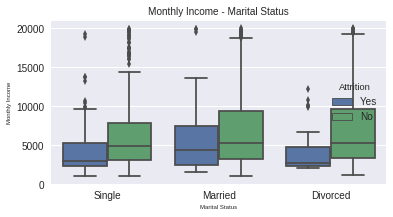

In [37]:
fig = plt.figure(figsize=(6,3))
sns.boxplot(x="MaritalStatus",y="MonthlyIncome",data=df, hue="Attrition")
plt.title("Monthly Income - Marital Status", fontsize=10)
plt.xlabel("Marital Status", fontsize=6)
plt.ylabel("Monthly Income", fontsize=6)

Text(0.5, 1.0, 'Percentage Salary Hike effect on Attrition')

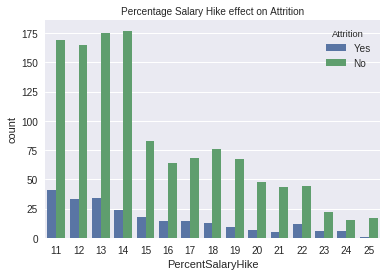

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df)
plt.title("Percentage Salary Hike effect on Attrition", fontsize=10)

Text(0, 0.5, 'Years since Last Promotion')

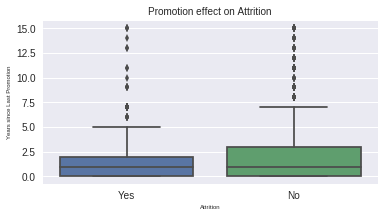

In [39]:
fig = plt.figure(figsize=(6,3))
sns.boxplot(x="Attrition",y="YearsSinceLastPromotion",data=df)
plt.title("Promotion effect on Attrition", fontsize=10)
plt.xlabel("Attrition", fontsize=6)
plt.ylabel("Years since Last Promotion", fontsize=6)

In [41]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [42]:
df = pd.get_dummies(df)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


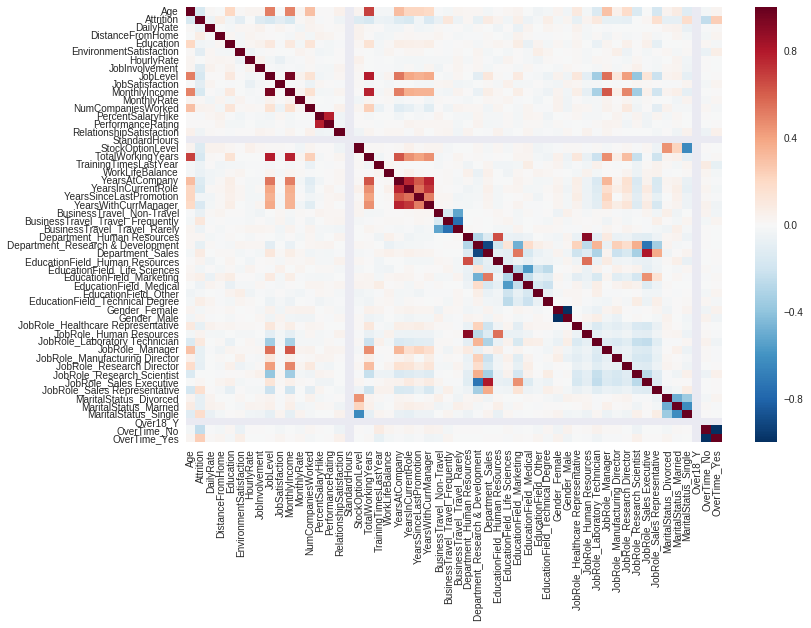

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1), df['Attrition'], test_size=0.15, random_state=0)

In [45]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred = rf.predict(X_test)

In [49]:
def print_score(y_test, y_pred):
    print('Accuracy score {}'.format(accuracy_score(y_test, y_pred)))
    print('Recall score {}'.format(recall_score(y_test, y_pred)))
    print('Precision score {}'.format(precision_score(y_test, y_pred)))
    print('F1 score {}'.format(f1_score(y_test, y_pred)))

print_score(y_test, y_pred)

Accuracy score 0.8371040723981901
Recall score 0.1794871794871795
Precision score 0.6363636363636364
F1 score 0.28


MonthlyIncome                        0.074530
Age                                  0.062279
DailyRate                            0.051634
TotalWorkingYears                    0.049518
MonthlyRate                          0.049024
YearsAtCompany                       0.045765
DistanceFromHome                     0.044409
HourlyRate                           0.039695
NumCompaniesWorked                   0.033763
PercentSalaryHike                    0.033118
YearsWithCurrManager                 0.029659
OverTime_No                          0.029188
OverTime_Yes                         0.028887
EnvironmentSatisfaction              0.027588
YearsInCurrentRole                   0.027575
WorkLifeBalance                      0.026944
JobSatisfaction                      0.025171
JobInvolvement                       0.024501
YearsSinceLastPromotion              0.024091
RelationshipSatisfaction             0.021346
StockOptionLevel                     0.021127
TrainingTimesLastYear             

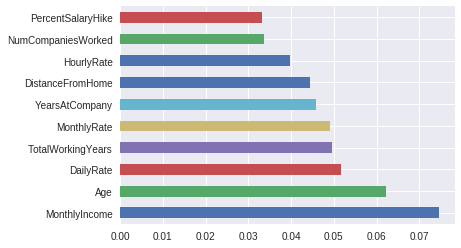

In [50]:
feat_importances = pd.Series(rf.feature_importances_, index=df.drop('Attrition', axis=1).columns)
print(feat_importances.sort_values(ascending=False))
feat_importances.sort_values(ascending=False).nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       182
           1       0.64      0.18      0.28        39

   micro avg       0.84      0.84      0.84       221
   macro avg       0.74      0.58      0.59       221
weighted avg       0.81      0.84      0.80       221



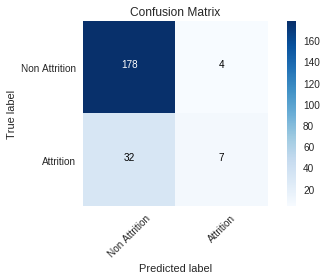

In [52]:
def plot_confusion_matrix(cm, classes):
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=cm, classes=["Non Attrition", "Attrition"])
print (classification_report(y_test, y_pred))

In [55]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('\nAfter OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("\nAfter OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 198
Before OverSampling, counts of label '0': 1051

After OverSampling, the shape of train_X: (2102, 53)
After OverSampling, the shape of train_y: (2102,) 


After OverSampling, counts of label '1': 1051
After OverSampling, counts of label '0': 1051


In [57]:
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print_score(y_test, y_pred)

Accuracy score 0.8552036199095022
Recall score 0.28205128205128205
Precision score 0.7333333333333333
F1 score 0.4074074074074074


              precision    recall  f1-score   support

           0       0.86      0.98      0.92       182
           1       0.73      0.28      0.41        39

   micro avg       0.86      0.86      0.86       221
   macro avg       0.80      0.63      0.66       221
weighted avg       0.84      0.86      0.83       221



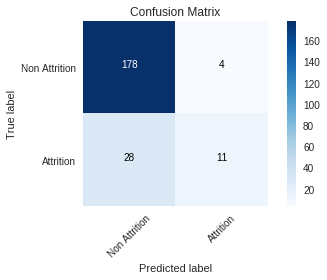

In [58]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=cm, classes=["Non Attrition", "Attrition"])
print (classification_report(y_test, y_pred))